In [4]:
import pandas as pd
from gspread_pandas import Spread, Client

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
prop = font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

%load_ext autoreload
%autoreload 2

from src.common import eprint
from src.drug import get_df_from_spread_and_sheet
from src.drug import draw_scatter_value_x_period
from src.drug import transform_df
from src.drug import print_df_individual


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load

In [5]:
spread = Spread('danbi2990', 'Drug_Raw')

In [6]:
eprint(spread.sheets)

0 <Worksheet '0_연도별' id:1819472556>
1 <Worksheet '1_구속' id:1062455333>
2 <Worksheet '2_유형' id:1295191696>
3 <Worksheet '3_성별' id:1835239061>
4 <Worksheet '4_직업' id:542844516>
5 <Worksheet '5_나이' id:85323788>
6 <Worksheet '6_지역' id:388447749>
7 <Worksheet '7_마약종류' id:728680991>


In [8]:
dfs = [transform_df(get_df_from_spread_and_sheet(spread, i)) for i in range(len(spread.sheets))]
print(len(dfs))

8


# 0_연도별

In [9]:
dfs[0]

,,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,합계,10102,10673,7546,7747,7154,7709,10649,9898,11875,9732,9174,9255,9965,9742,11916,14214,14123,12613
1,대마,1482,1965,1608,1231,1032,835,1170,1045,1712,1837,1189,1042,1214,1154,1139,1435,1727,1533
2,마약,661,790,1211,1203,768,868,958,1396,2198,1124,759,582,690,669,1153,1383,1475,1467
3,향정,7959,7918,4727,5313,5354,6006,8521,7457,7965,6771,7226,7631,8061,7919,9624,11396,10921,9613


# 1_구속

In [10]:
dfs[1].head()

,대마_건수,대마_단속(명),대마_구속,마약_건수,마약_단속(명),마약_구속,향정_건수,향정_단속(명),향정_구속,합계_건수,합계_단속(명),합계_구속,기간
0,85,108,12,29,42,3,569,658,129,683,808,144,201901
1,65,96,5,27,28,7,501,606,156,593,730,168,201812
2,74,102,5,30,32,5,630,750,153,734,884,163,201811
3,109,140,17,27,32,3,835,1037,143,971,1209,163,201810
4,88,136,19,43,61,2,619,728,159,750,925,180,201809


In [15]:
cols = dfs[1].columns.tolist()
cols.remove('기간')
cols

['대마_건수',
 '대마_단속(명)',
 '대마_구속',
 '마약_건수',
 '마약_단속(명)',
 '마약_구속',
 '향정_건수',
 '향정_단속(명)',
 '향정_구속',
 '합계_건수',
 '합계_단속(명)',
 '합계_구속']

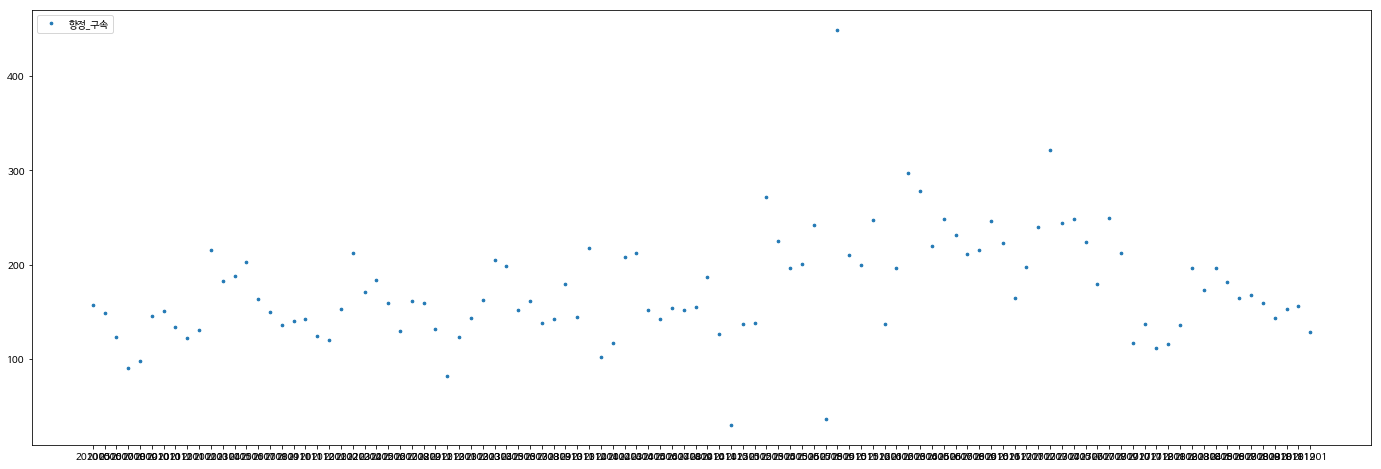

In [18]:
draw_scatter_value_x_period(dfs[1].sort_values('기간', ascending=True), '기간', ['향정_구속'])

# 2_유형

In [19]:
dfs[2].head()

,기간,종류,밀조,밀수,밀매,밀경,투약,소지,기타,합계
0,201901,향정,0,34,170,0,348,60,46,658
1,201901,합계,0,46,205,7,424,73,53,808
2,201901,마약,0,1,14,7,10,4,6,42
3,201901,대마,0,11,21,0,66,9,1,108
4,201812,향정,0,19,138,0,326,43,80,606


In [14]:
type_series = df3.columns.tolist()[1:-1]
type_series

['밀조', '밀수', '밀매', '밀경', '투약', '소지', '기타', '합계']

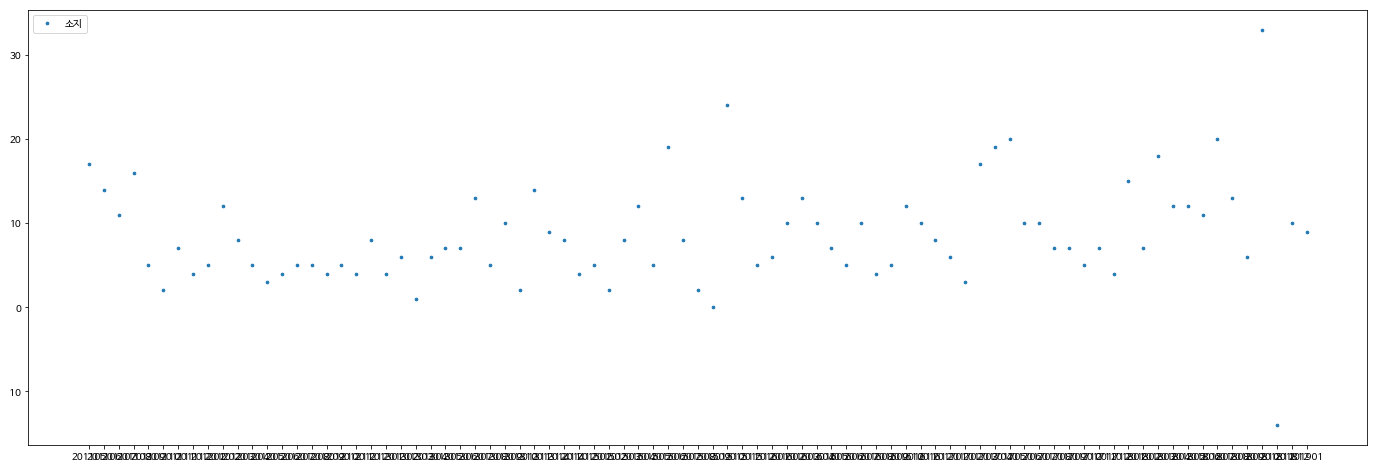

In [31]:
type_ = '대마'
y = ['소지']

draw_scatter_value_x_period(dfs[2].loc[dfs[2]['종류']==type_].sort_values('기간', ascending=True), '기간', y)

# 3_성별

In [32]:
dfs[3].head()

,기간,대마_남,대마_여,마약_남,마약_여,향정_남,향정_여,합계_남,합계_여,합계
0,201901,96,12,32,10,528,130,656,152,808
1,201812,84,12,19,9,475,131,578,152,730
2,201811,97,5,22,10,608,142,727,157,884
3,201810,116,24,19,13,840,197,975,234,1209
4,201809,113,23,43,18,593,135,749,176,925


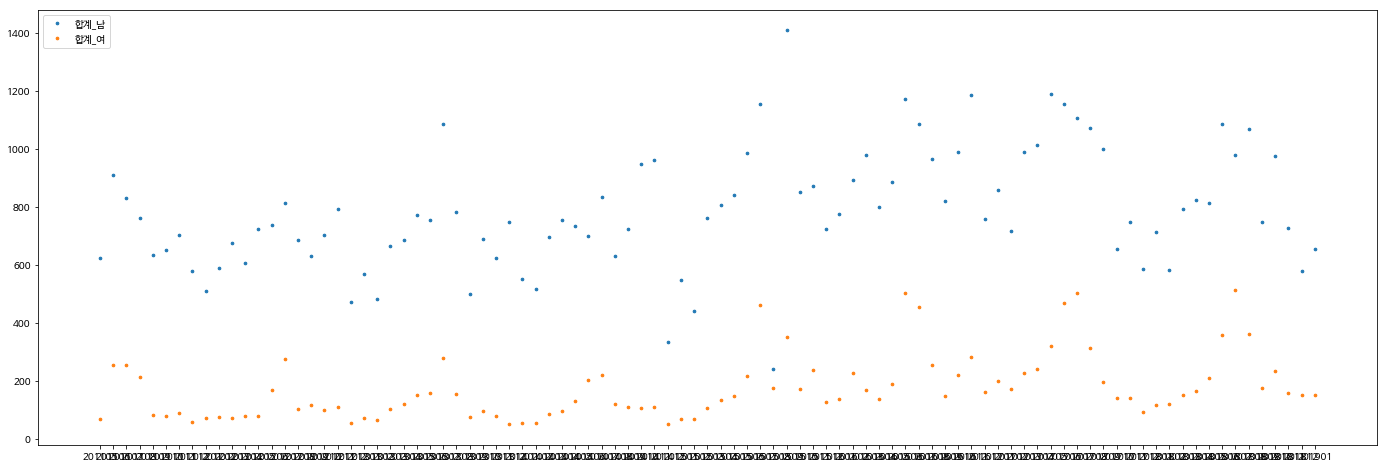

In [35]:
# y = ['향정_남', '향정_여']
y = ['합계_남', '합계_여']
draw_scatter_value_x_period(dfs[3].sort_values('기간', ascending=True), '기간', y)

# 4_직업

In [36]:
dfs[4].head()

,기간,종류,대마,마약,향정,합계
0,201901,회사원,7,2,21,30
1,201901,합계,108,42,658,808
2,201901,학생,3,0,2,5
3,201901,직업미상,7,6,110,123
4,201901,의료,0,4,9,13


In [39]:
dfs[4]['종류'].value_counts()

건설       93
합계       93
학생       93
농업       93
서비스업     93
부동산업     93
기타       93
예술       93
무직       93
회사원      93
직업미상     93
의료       93
어업       93
공업       93
금융/증권    93
도소매업     93
가사       93
운송업      93
유흥업      93
노동       93
Name: 종류, dtype: int64

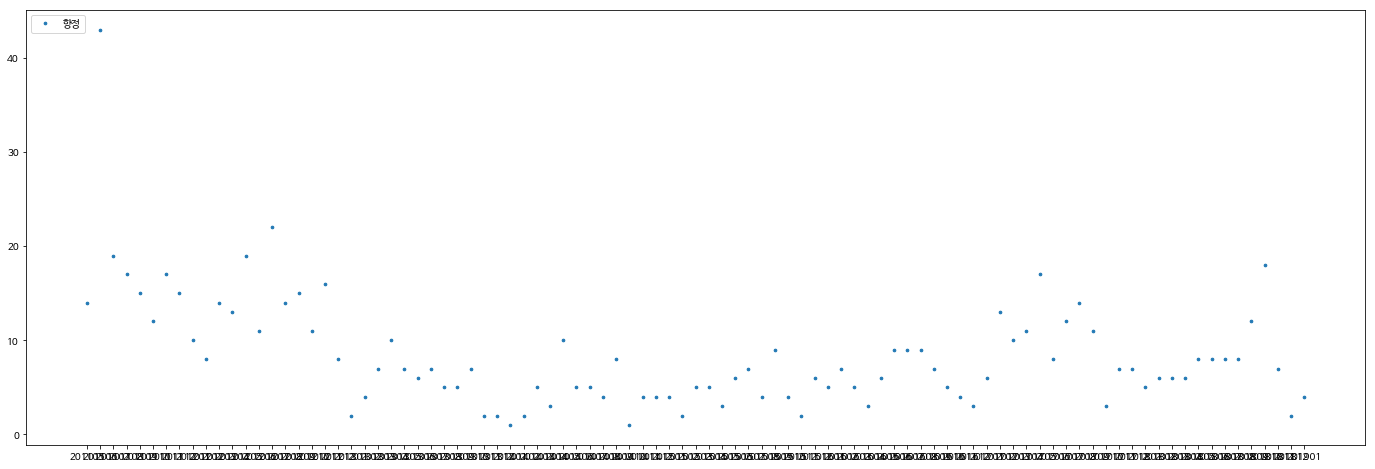

In [38]:
type_ = '유흥업'
y = ['향정']

draw_scatter_value_x_period(dfs[4].loc[dfs[4]['종류']==type_].sort_values('기간', ascending=True), '기간', y)

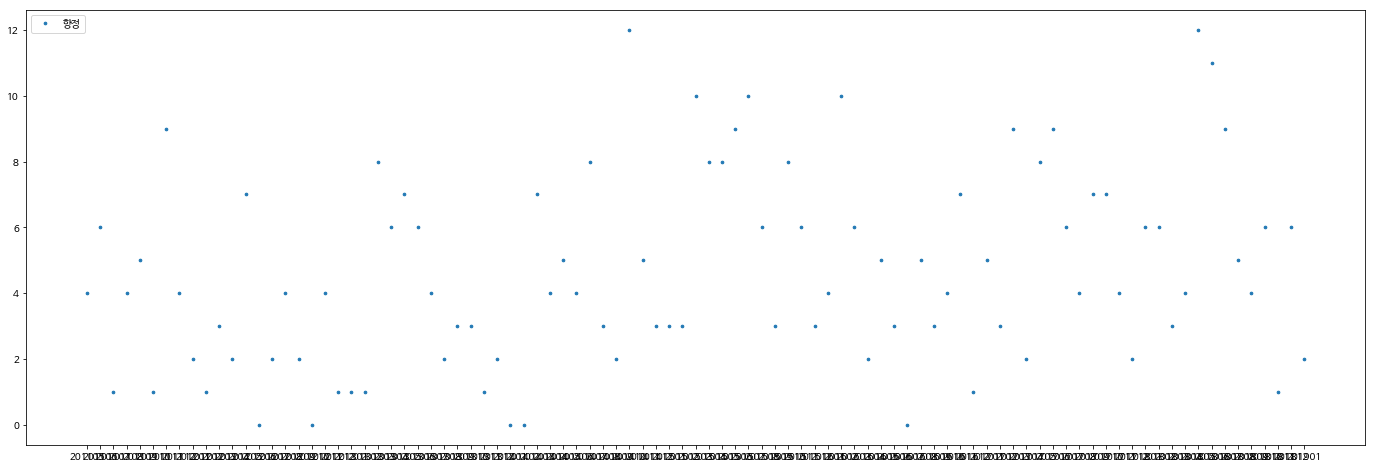

In [40]:
type_ = '학생'
y = ['향정']

draw_scatter_value_x_period(dfs[4].loc[dfs[4]['종류']==type_].sort_values('기간', ascending=True), '기간', y)

# 5_나이

In [41]:
dfs[5].head()

,기간,종류,15 미만,15-18,19,20-29,30-39,40-49,50-59,60 이상,미상,합계
0,201901,향정,0,2,6,111,176,180,134,27,22,658
1,201901,합계,1,5,6,153,217,200,162,35,29,808
2,201901,마약,0,1,0,1,11,8,10,5,6,42
3,201901,대마,1,2,0,41,30,12,18,3,1,108
4,201812,향정,0,2,9,102,146,176,141,21,9,606


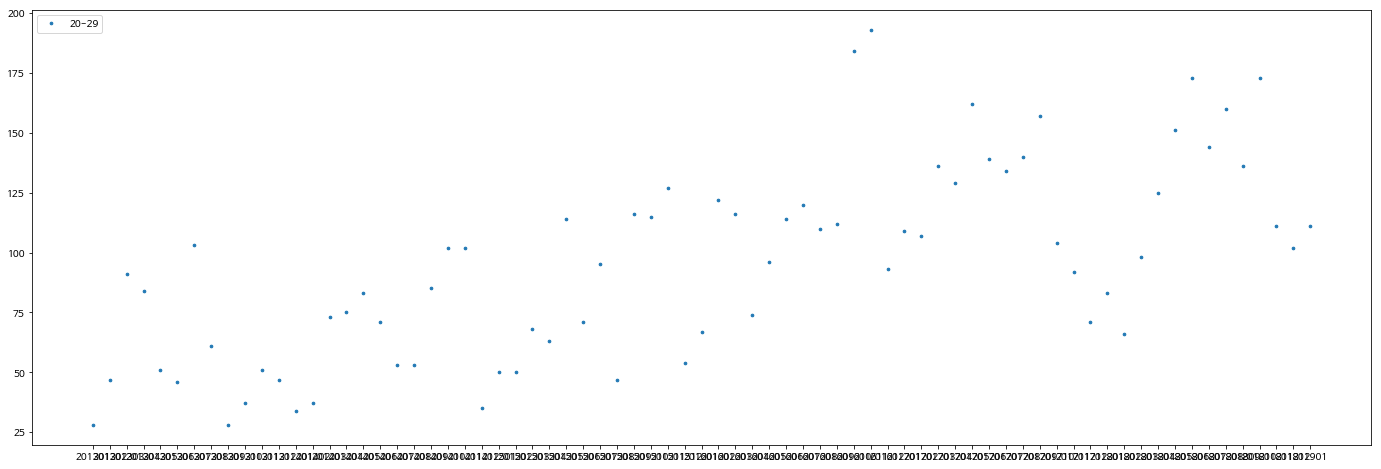

In [43]:
type_ = '향정'
y = ['20-29']

draw_scatter_value_x_period(dfs[5].loc[dfs[5]['종류']==type_].sort_values('기간', ascending=True), '기간', y)

# 6_지역

In [44]:
dfs[6].head()

,기간,지역,대마,마약,향정,합계
0,201901,합계,108,42,658,808
1,201901,충북,3,3,9,15
2,201901,제주,4,0,2,6
3,201901,전북,1,0,7,8
4,201901,인천경기,29,11,204,244


# 7_마약종류

In [18]:
df5 = transform_df(dfs[5])

idx_amuse = df5['종류'] == '유흥업'
df5.loc[idx_amuse]

,종류,대마,마약,향정,합계,기간
4,유흥업,0,0,4,4,201901
24,유흥업,10,0,94,104,201812
44,유흥업,8,0,92,100,201811
64,유흥업,8,0,85,93,201810
84,유흥업,8,0,67,75,201809
104,유흥업,6,0,55,61,201808
124,유흥업,4,0,47,51,201807
144,유흥업,4,0,39,43,201806
164,유흥업,4,0,31,35,201805
184,유흥업,1,0,23,24,201804


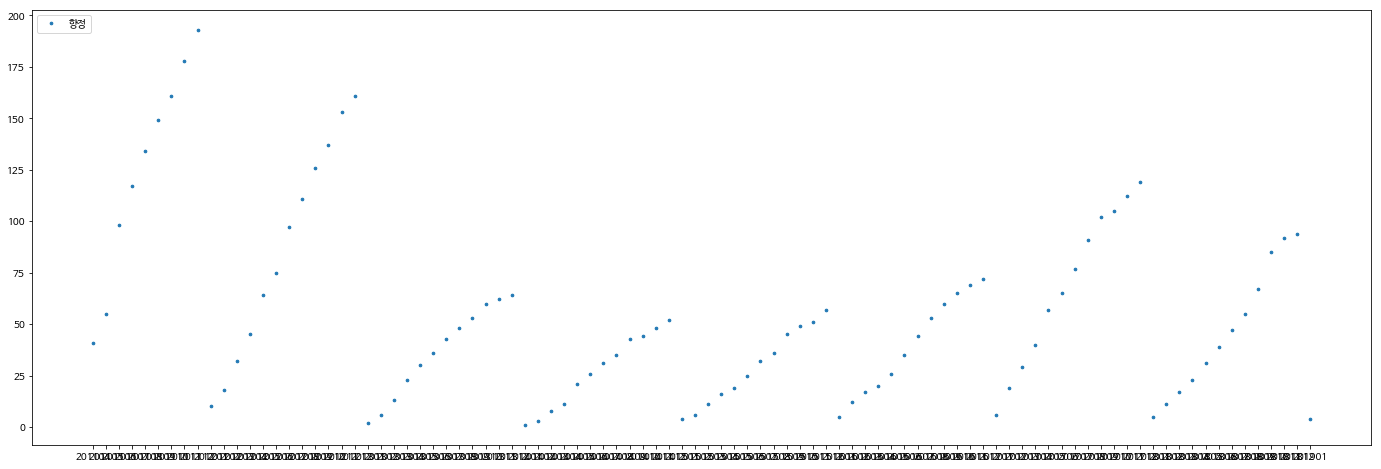

In [19]:
# amuse = df5.loc[idx_amuse, ['기간', '향정']].sort_values('기간', ascending=True)
draw_scatter_value_x_period(df5.loc[idx_amuse].sort_values('기간', ascending=True), '기간', ['향정'])
# plt.figure(figsize=(24, 8))
# plt.scatter(amuse['기간'], amuse['향정'].astype(int))
# plt.scatter(df5.loc[idx_amuse, '기간'], df5.loc[idx_amuse, '향정'].astype(int))
# plt.title('유흥업 & 향정')

# 6_나이

In [20]:
dfs[6].head()

,종류,15 미만,15-18,19,20-29,30-39,40-49,50-59,60 이상,미상,합계,기간
0,합계,1,5,6,153,217,200,162,35,29,808,201901
1,대마,1,2,0,41,30,12,18,3,1,108,201901
2,마약,0,1,0,1,11,8,10,5,6,42,201901
3,향정,0,2,6,111,176,180,134,27,22,658,201901
4,합계,1,70,72,"2,118","2,996","3,305","2,352","1,457",242,"12,613",201812


In [21]:
df6 = transform_df(dfs[6])
df6.head()

,종류,15 미만,15-18,19,20-29,30-39,40-49,50-59,60 이상,미상,합계,기간
0,합계,1,5,6,153,217,200,162,35,29,808,201901
1,대마,1,2,0,41,30,12,18,3,1,108,201901
2,마약,0,1,0,1,11,8,10,5,6,42,201901
3,향정,0,2,6,111,176,180,134,27,22,658,201901
4,합계,1,70,72,2118,2996,3305,2352,1457,242,12613,201812


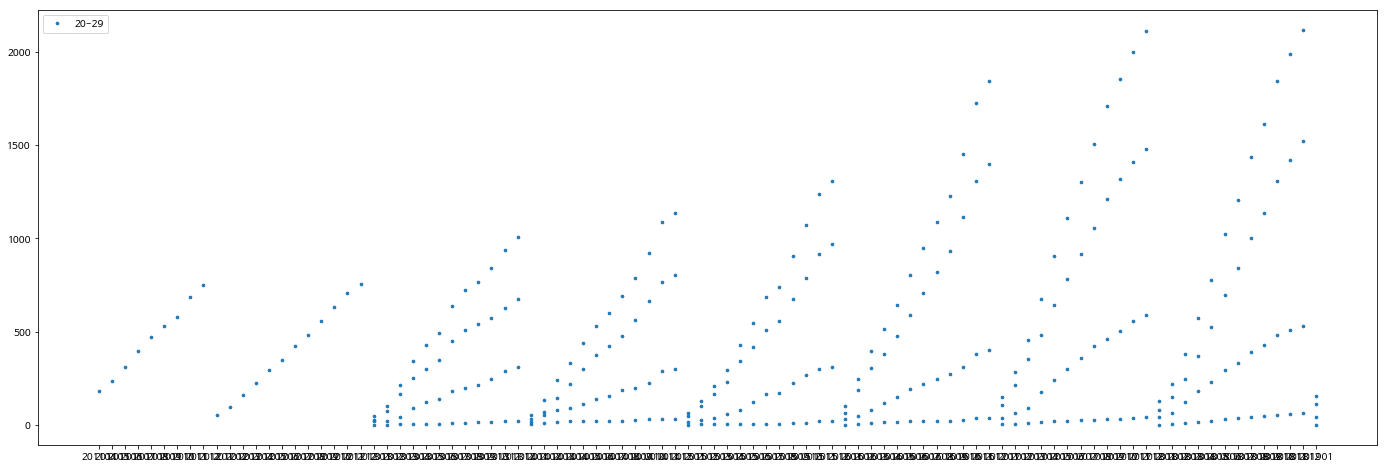

In [22]:
draw_scatter_value_x_period(df6.sort_values('기간', ascending=True), '기간', ['20-29'],)